In [1]:
import pandas as pd
df=pd.read_csv("/content/TSLA.csv")
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,3.800000,5.000000,3.508000,4.778000,4.778000,93831500
1,2010-06-30,5.158000,6.084000,4.660000,4.766000,4.766000,85935500
2,2010-07-01,5.000000,5.184000,4.054000,4.392000,4.392000,41094000
3,2010-07-02,4.600000,4.620000,3.742000,3.840000,3.840000,25699000
4,2010-07-06,4.000000,4.000000,3.166000,3.222000,3.222000,34334500
...,...,...,...,...,...,...,...
2951,2022-03-18,874.489990,907.849976,867.390015,905.390015,905.390015,33408500
2952,2022-03-21,914.979980,942.849976,907.090027,921.159973,921.159973,27327200
2953,2022-03-22,930.000000,997.859985,921.750000,993.979980,993.979980,35289500
2954,2022-03-23,979.940002,1040.699951,976.400024,999.109985,999.109985,40225400


In [2]:
df.shape

(2956, 7)

In [4]:
df.dtypes

,0
Date,object
Open,float64
High,float64
Low,float64
Close,float64
Adj Close,float64
Volume,int64


In [10]:
df["Open"].duplicated().sum()

np.int64(290)

In [11]:
df.duplicated().sum()

np.int64(0)

In [16]:
from os import remove
df[["Open","Date","High","Low","Close","Adj Close","Volume"]].isnull().sum()

,0
Open,0
Date,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0


In [17]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

import matplotlib
matplotlib.use('Agg')  # Use Agg backend for matplotlib
import matplotlib.pyplot as plt
plt.switch_backend('Agg')  # In case only plt is used
%matplotlib inline

import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Set a seaborn style
sns.set(style='whitegrid')

# Increase figure size for plots
plt.rcParams['figure.figsize'] = (10, 6)

In [18]:
# Load the Tesla stock data
data_path = '/content/TSLA.csv'
df = pd.read_csv(data_path, encoding='ascii', delimiter=',')

# Convert 'Date' column to datetime. Many times, the date column is provided as a string.
df['Date'] = pd.to_datetime(df['Date'], infer_datetime_format=True)

# Display the first few rows of the dataframe to verify our load
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,3.800,5.000,3.508,4.778,4.778,93831500
1,2010-06-30,5.158,6.084,4.660,4.766,4.766,85935500
2,2010-07-01,5.000,5.184,4.054,4.392,4.392,41094000
3,2010-07-02,4.600,4.620,3.742,3.840,3.840,25699000
4,2010-07-06,4.000,4.000,3.166,3.222,3.222,34334500


In [19]:
# Data Cleaning and Preprocessing

# Check for missing values
missing_values = df.isnull().sum()
print('Missing values in each column:')
print(missing_values)

# Since the dataset is relatively clean, we proceed further.

# It's always important to verify the dataframe info
df.info()

Missing values in each column:
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2956 entries, 0 to 2955
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2956 non-null   datetime64[ns]
 1   Open       2956 non-null   float64       
 2   High       2956 non-null   float64       
 3   Low        2956 non-null   float64       
 4   Close      2956 non-null   float64       
 5   Adj Close  2956 non-null   float64       
 6   Volume     2956 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 161.8 KB


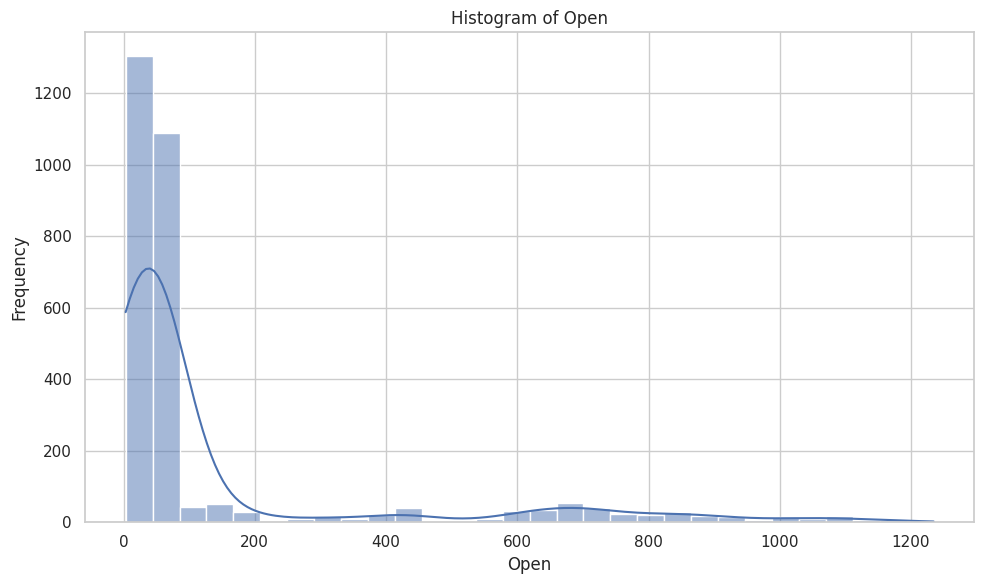

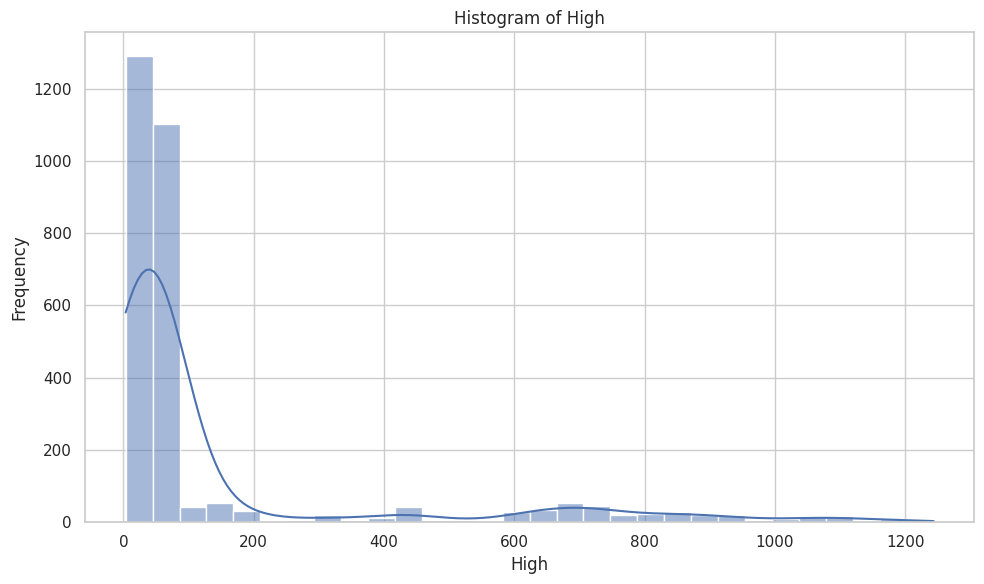

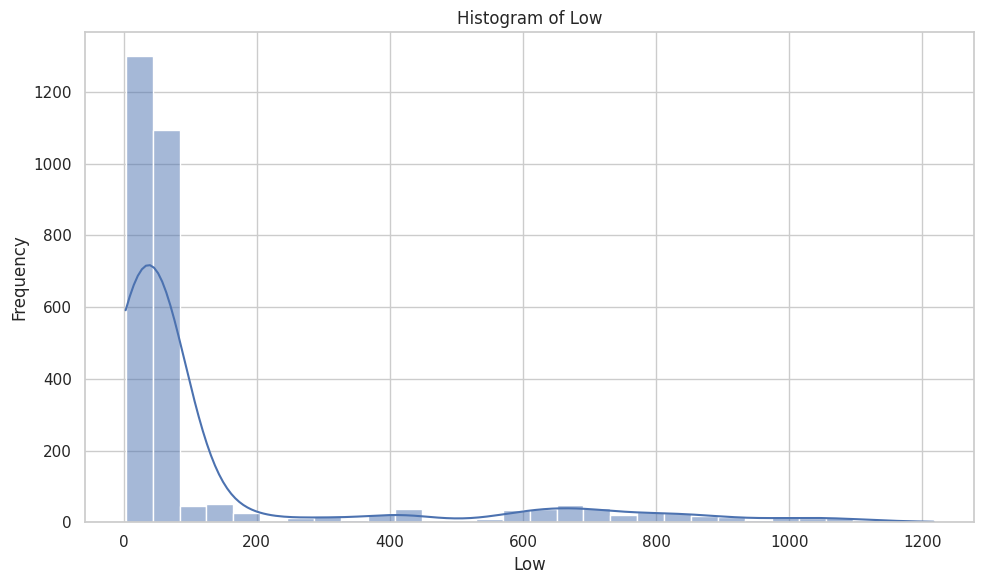

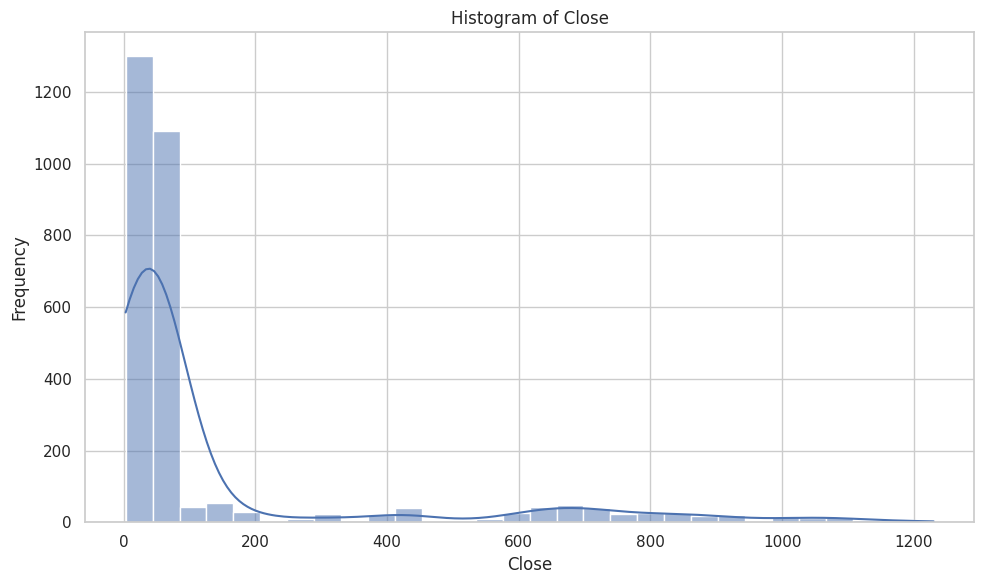

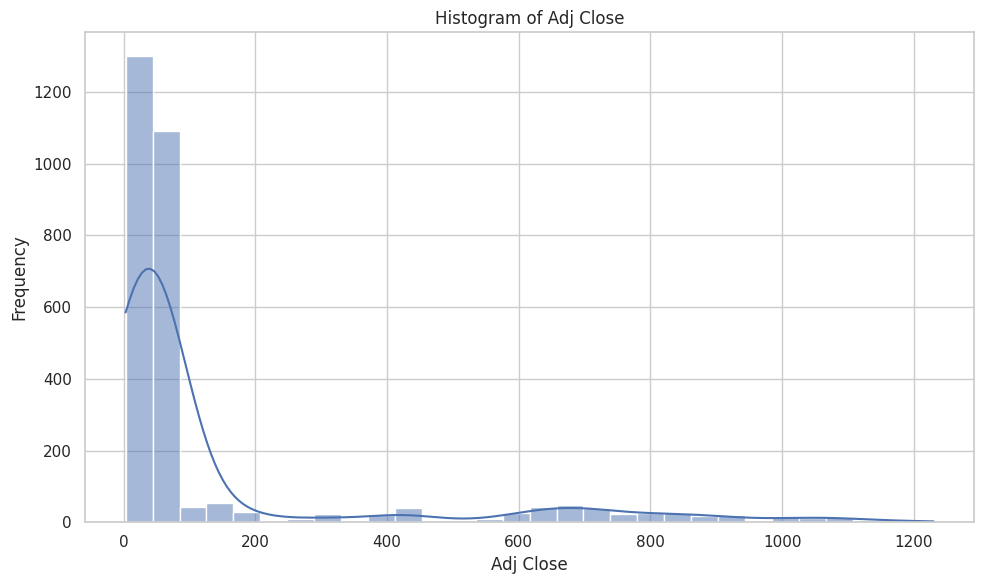

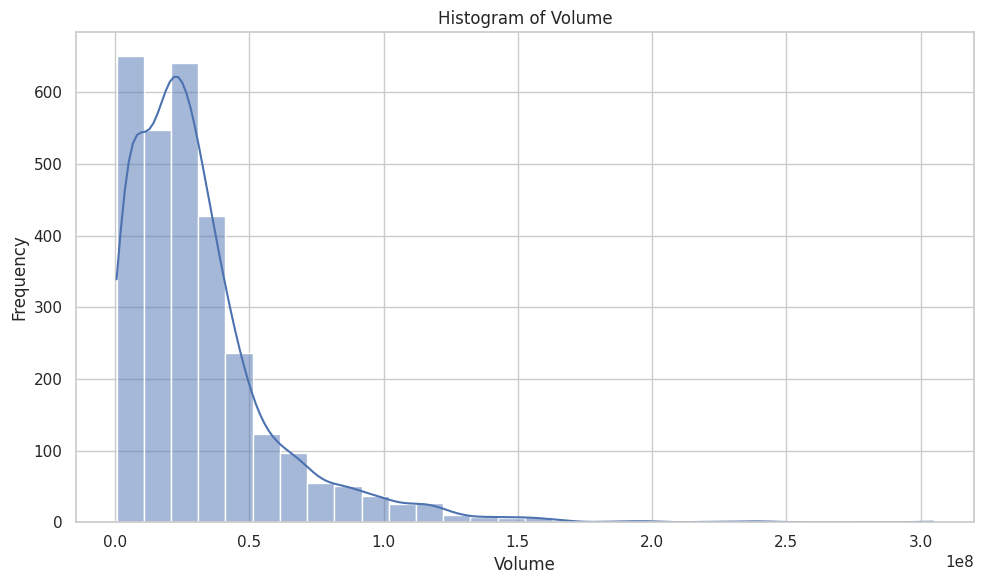

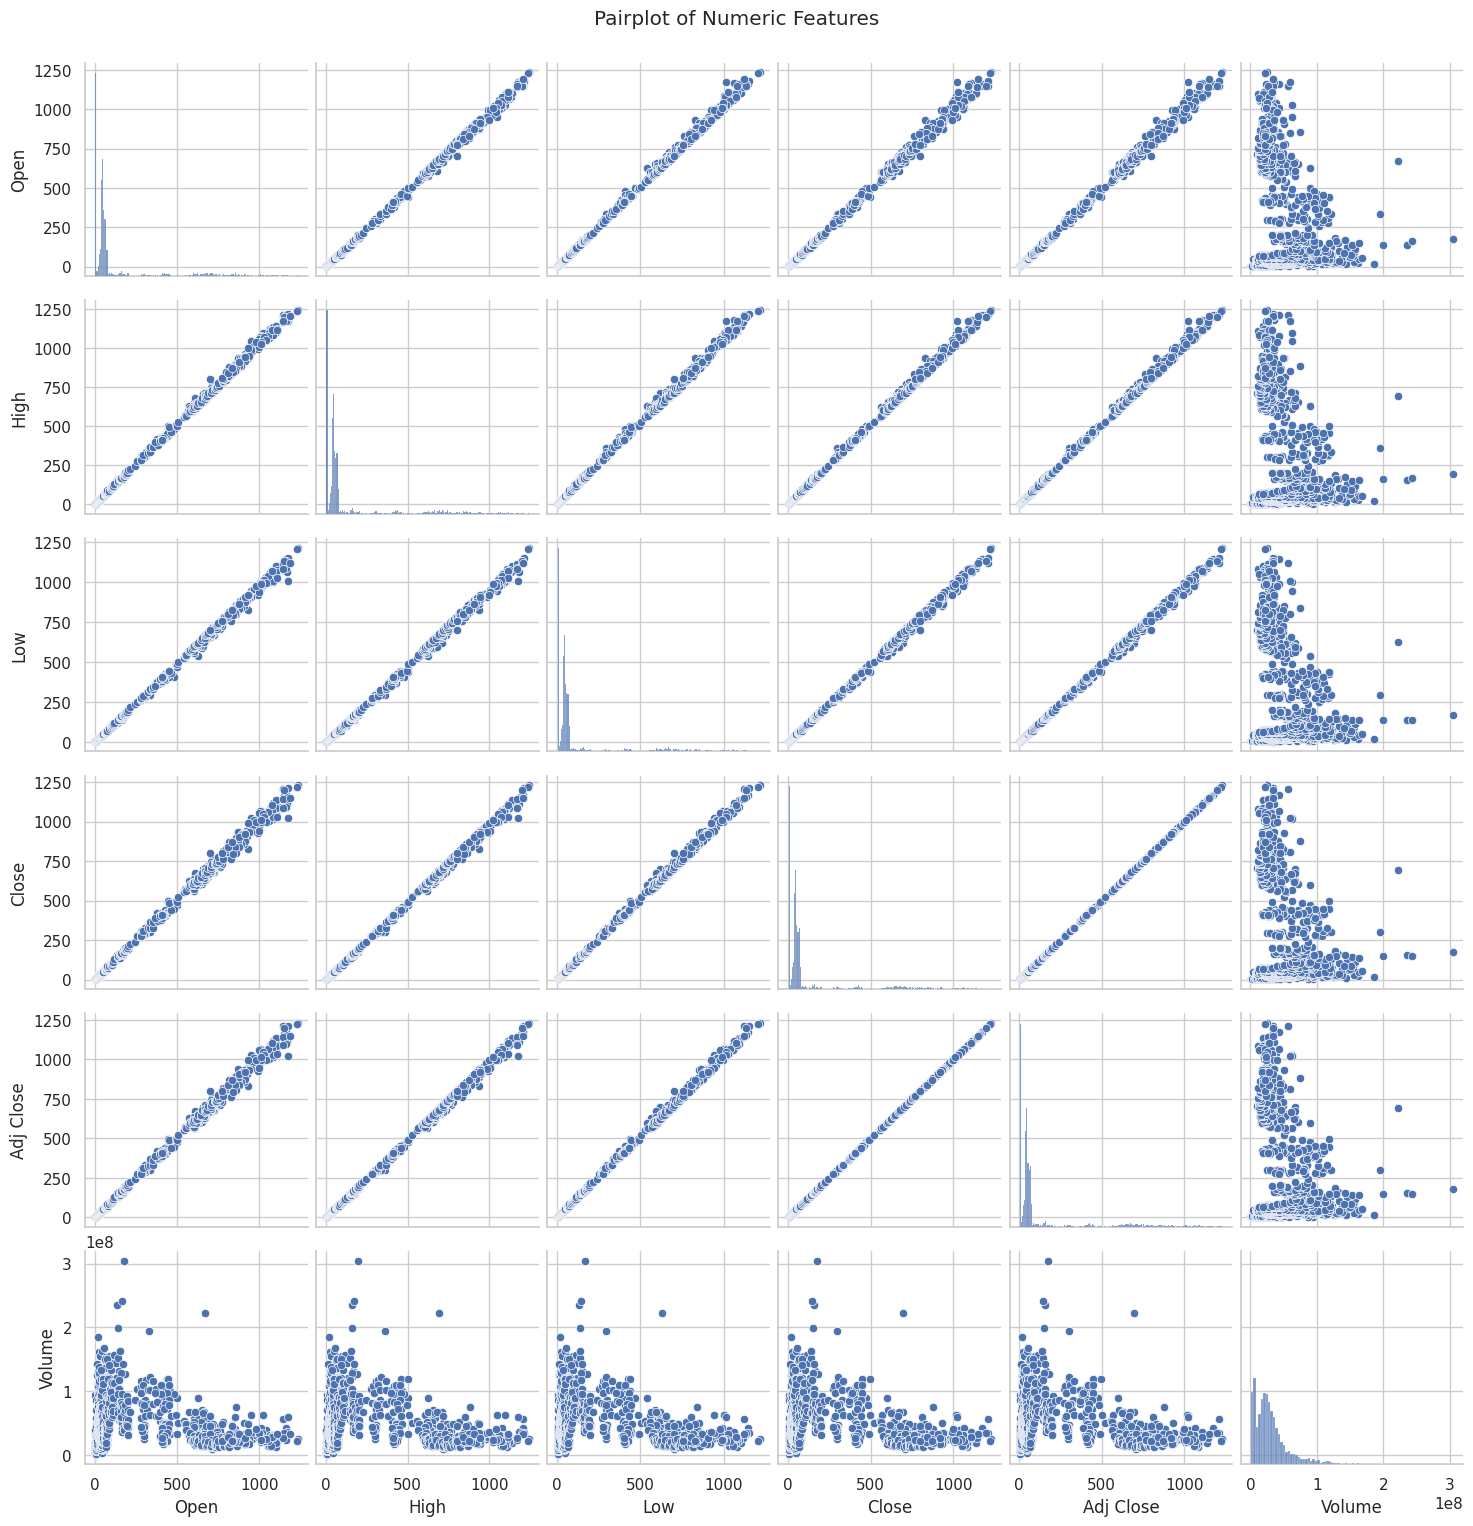

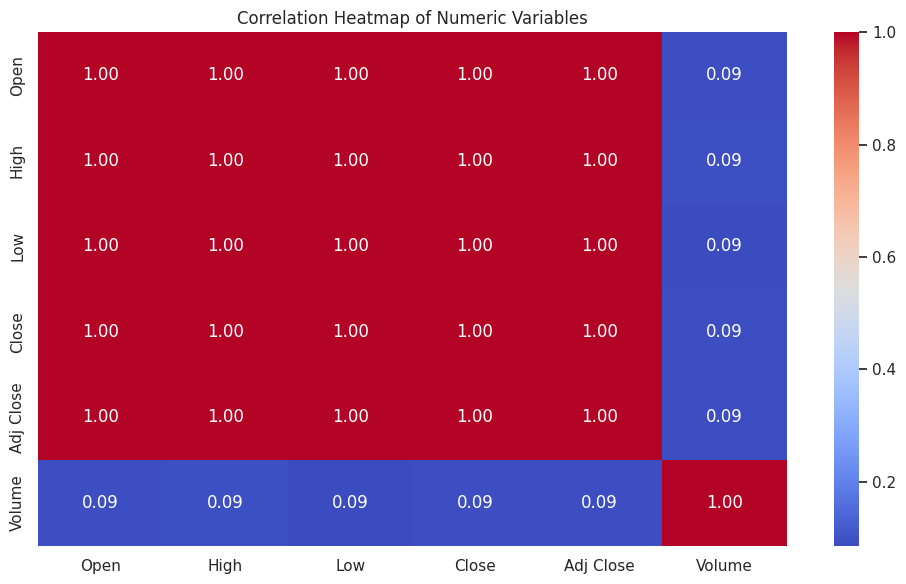

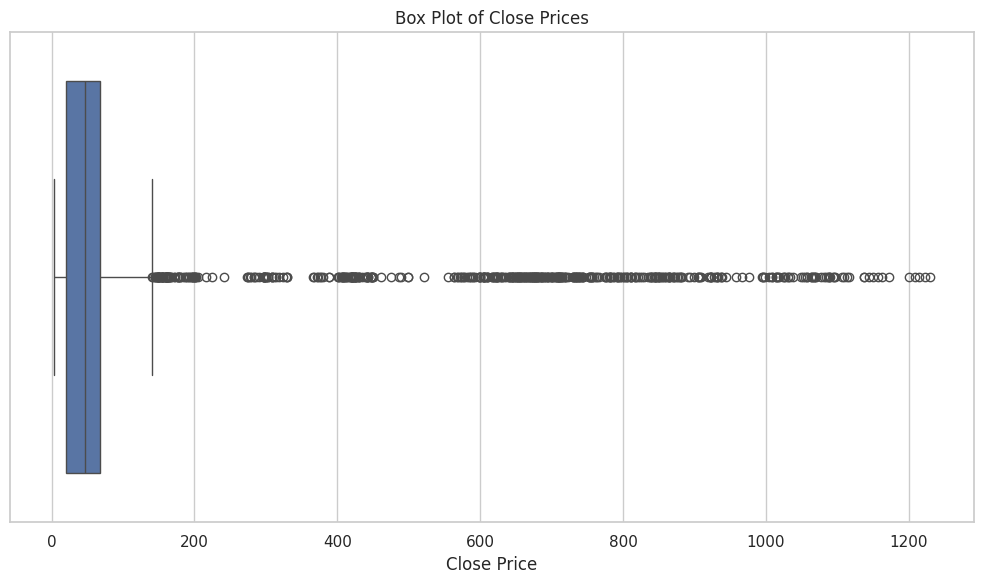

In [20]:
# Exploratory Data Analysis (EDA)

# Histogram for each numeric column
numeric_cols = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
for col in numeric_cols:
    plt.figure()
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

# Pair Plot to visualize pairwise relationships between numeric columns
sns.pairplot(df[numeric_cols])
plt.suptitle('Pairplot of Numeric Features', y=1.02)
plt.show()

# Correlation Heatmap
numeric_df = df.select_dtypes(include=[np.number])
if numeric_df.shape[1] >= 4:
    plt.figure()
    corr = numeric_df.corr()
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Heatmap of Numeric Variables')
    plt.tight_layout()
    plt.show()
else:
    print('Not enough numeric variables to create a correlation heatmap.')

# Box Plot for checking outliers in 'Close' price
plt.figure()
sns.boxplot(x=df['Close'])
plt.title('Box Plot of Close Prices')
plt.xlabel('Close Price')
plt.tight_layout()
plt.show()

R² Score: 1.000
Mean Squared Error: 20.598


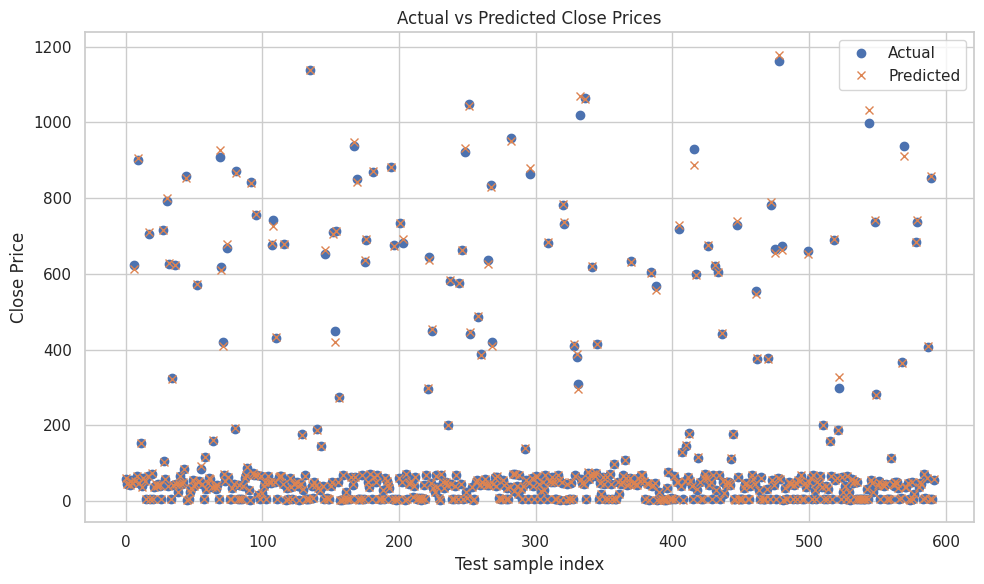

In [21]:
# Prediction Model: Predicting the 'Close' Price using Linear Regression

# Define the features and the target variable
features = ['Open', 'High', 'Low', 'Volume']
target = 'Close'

# Prepare the data
X = df[features]
y = df[target]

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Perform prediction on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R² Score: {r2:.3f}")
print(f"Mean Squared Error: {mse:.3f}")

# Plotting the Actual vs Predicted values
plt.figure()
plt.plot(y_test.values, label='Actual', marker='o', linestyle='')
plt.plot(y_pred, label='Predicted', marker='x', linestyle='')
plt.title('Actual vs Predicted Close Prices')
plt.xlabel('Test sample index')
plt.ylabel('Close Price')
plt.legend()
plt.tight_layout()
plt.show()